<a href="https://colab.research.google.com/github/Vishal35198/ECG-CNN-1D/blob/main/Copy_of_ECG_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
khyeh0719_ptb_xl_dataset_path = kagglehub.dataset_download('khyeh0719/ptb-xl-dataset')

print('Data source import complete.')


100%|██████████| 1.72G/1.72G [01:28<00:00, 20.9MB/s]

Extracting files...


Data source import complete.


In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# import wfdb
import os
import ast

In [3]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 91.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [11]:
os.listdir(khyeh0719_ptb_xl_dataset_path)

['ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1']

In [15]:
path = khyeh0719_ptb_xl_dataset_path+'/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1'

In [18]:
# path = '/kaggle/input/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'
ecg_data = pd.read_csv(path + '/ptbxl_database.csv', index_col='ecg_id')

scp_data = pd.read_csv(path + '/scp_statements.csv', index_col=0)
scp_data = scp_data[scp_data.diagnostic == 1]

In [19]:
ecg_data.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [20]:
scp_data.head()

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [21]:
import wfdb
def load_signals(df, path):
    data = [wfdb.rdsamp(os.path.join(path, link)) for link in df.filename_lr]
    data = np.array([signal for signal, meta in data])
    return data

ecg_signal = load_signals(ecg_data, path)

In [22]:
ecg_signal[:,:,11].shape

(21837, 1000)

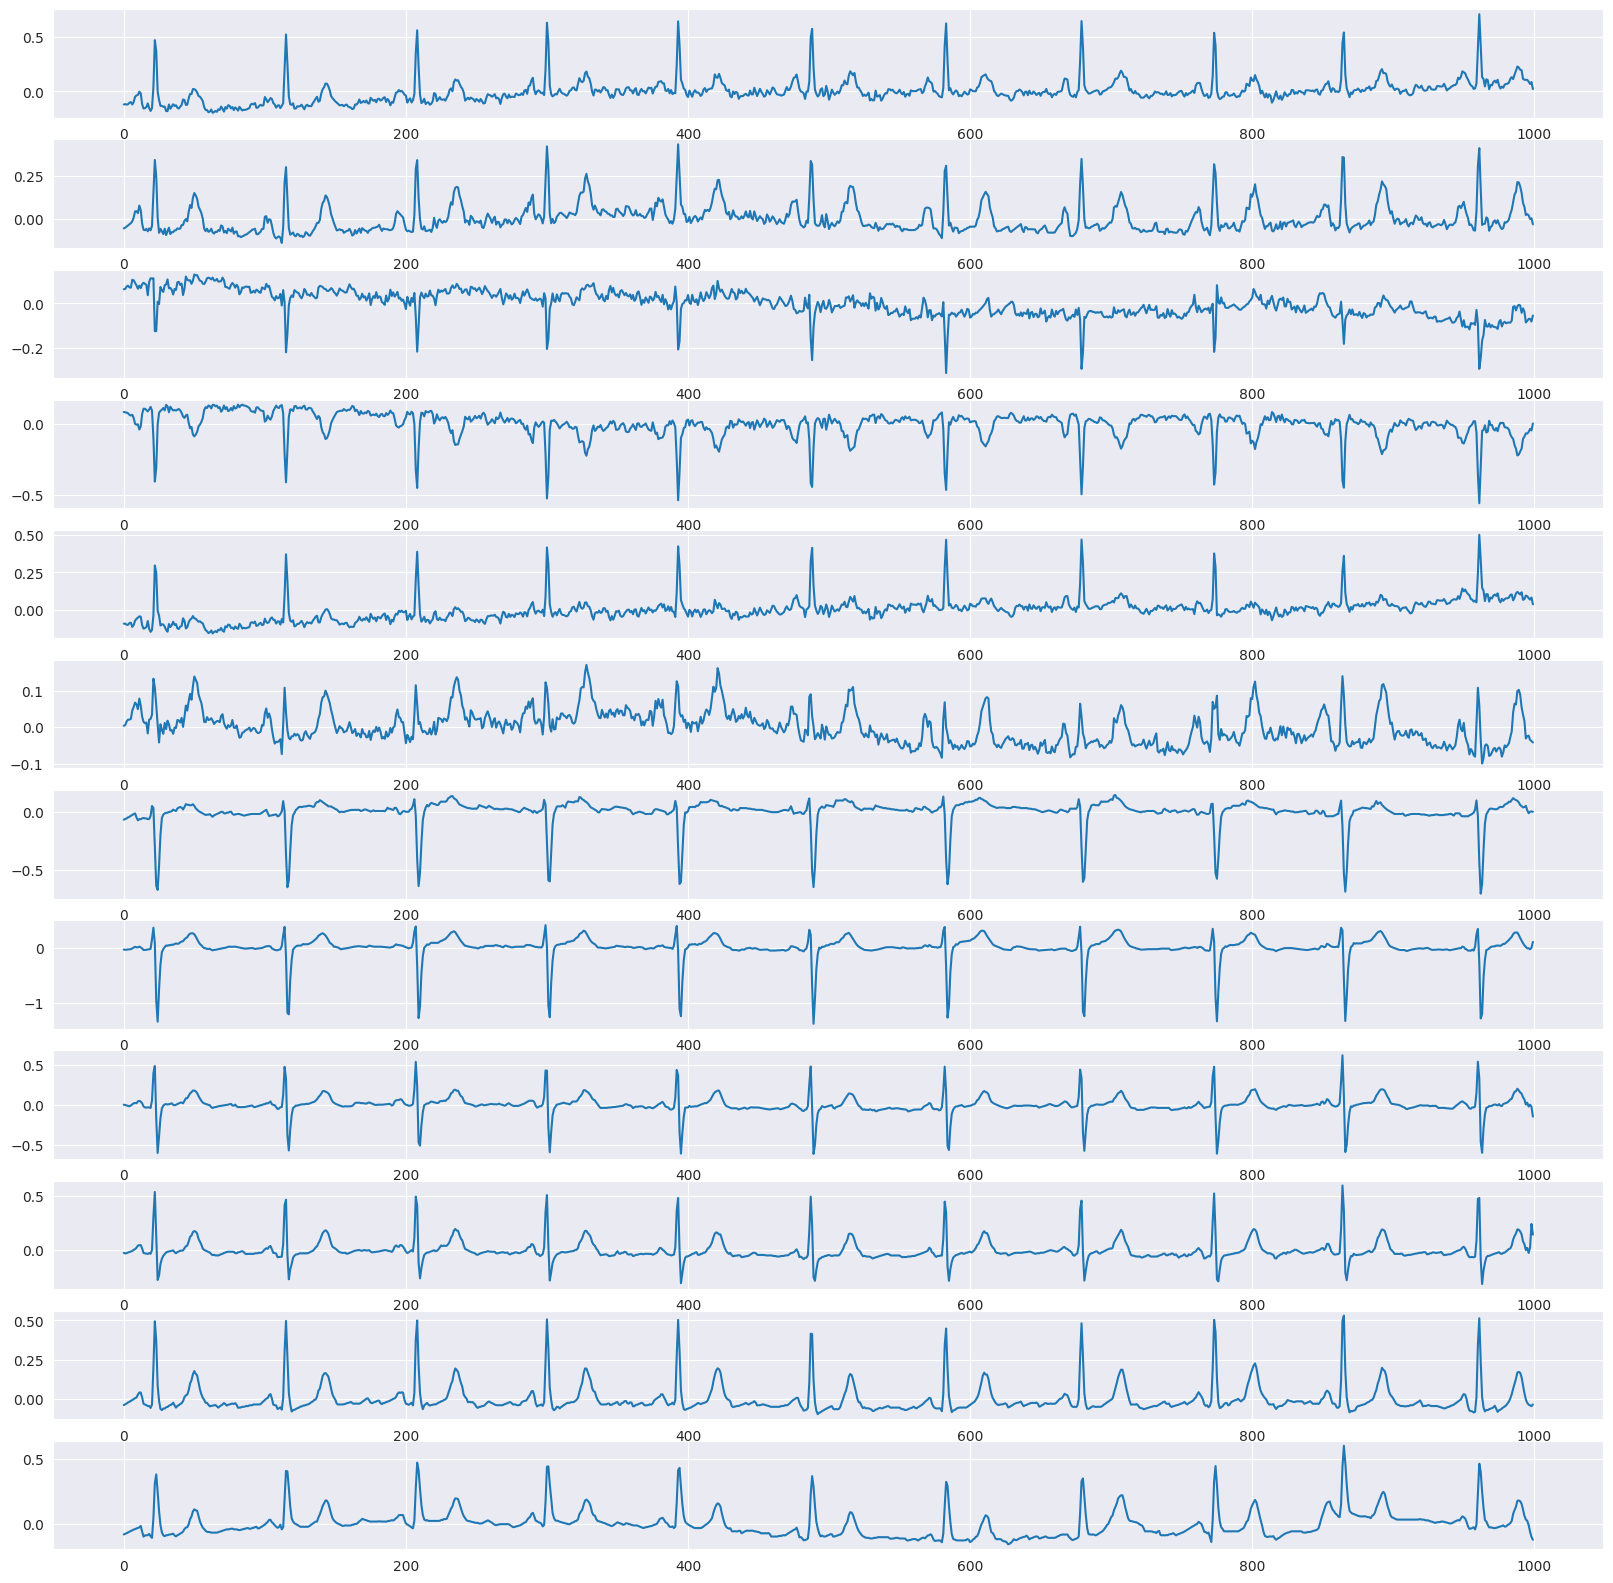

In [23]:
sns.set_style("darkgrid")

sample = ecg_signal[0]
fix, axes = plt.subplots(sample.shape[1], 1, figsize=(20,20))
for i in range(sample.shape[1]):
    sns.lineplot(x=np.arange(sample.shape[0]), y=sample[:, i], ax=axes[i])
plt.show()

In [24]:
# number of different values
ecg_data[[col for col in ecg_data.columns if col not in ('scp_codes', 'scp_classes')]].nunique(dropna=True)

,0
patient_id,18885
age,94
sex,2
height,77
weight,127
nurse,12
site,51
device,11
recording_date,21813
report,9883


In [25]:
ecg_data.isnull().sum()

,0
patient_id,0
age,89
sex,0
height,14854
weight,12408
nurse,1509
site,18
device,0
recording_date,0
report,0


In [26]:
ecg_data['scp_codes']

,scp_codes
ecg_id,
1,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}"
2,"{'NORM': 80.0, 'SBRAD': 0.0}"
3,"{'NORM': 100.0, 'SR': 0.0}"
4,"{'NORM': 100.0, 'SR': 0.0}"
5,"{'NORM': 100.0, 'SR': 0.0}"
...,...
21833,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST..."
21834,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}"
21835,"{'ISCAS': 50.0, 'SR': 0.0}"


In [27]:
ecg_data['scp_codes'] = ecg_data['scp_codes'].apply(lambda x: ast.literal_eval(x))

In [28]:
def superclasses(scp):
    res = set()
    for k in scp.keys():
        if k in scp_data.index:
            res.add(scp_data.loc[k].diagnostic_class)

    return list(res)

ecg_data['scp_classes'] = ecg_data['scp_codes'].apply(superclasses)

In [29]:
X = pd.DataFrame(index=ecg_data.index)

X['sex'] = ecg_data['sex']

X['height'] = ecg_data.groupby('sex')['height'].transform(lambda x: x.fillna(x.mean()))

X['weight'] = ecg_data.groupby('sex')['weight'].transform(lambda x: x.fillna(x.mean()))

X['infarction_stadium1'] = ecg_data['infarction_stadium1'].replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium I-II': 2,
    'Stadium II': 3,
    'Stadium II-III': 4,
    'Stadium III': 5
}).fillna(0)

X['infarction_stadium2'] = ecg_data['infarction_stadium2'].replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium II': 2,
    'Stadium III': 3
}).fillna(0)

# 0 represents unknown
X['heart_axis'] = ecg_data.heart_axis.replace({
    'LAD': 1,
    'ALAD': 2,
    'RAD': 3,
    'AXR': 4,
    'MID': 5,
    'ARAD': 6,
    'AXL': 7,
    'SAG': 8
}).fillna(0)

X['pacemaker'] = (ecg_data.pacemaker == 'ja, pacemaker').astype(float)

# X represents meta data
X

<ipython-input-29-c799442b4fb0>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['infarction_stadium1'] = ecg_data['infarction_stadium1'].replace({
<ipython-input-29-c799442b4fb0>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['infarction_stadium2'] = ecg_data['infarction_stadium2'].replace({
<ipython-input-29-c799442b4fb0>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

,sex,height,weight,infarction_stadium1,infarction_stadium2,heart_axis,pacemaker
ecg_id,,,,,,,
1,1,160.987860,63.000000,0.0,0.0,0.0,0.0
2,0,173.494364,70.000000,0.0,0.0,0.0,0.0
3,1,160.987860,69.000000,0.0,0.0,0.0,0.0
4,0,173.494364,82.000000,0.0,0.0,0.0,0.0
5,1,160.987860,70.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21833,1,160.987860,64.556847,0.0,0.0,1.0,0.0
21834,0,173.494364,78.504823,4.0,0.0,5.0,0.0
21835,1,160.987860,64.556847,0.0,0.0,5.0,0.0


In [30]:
Y = ecg_signal

In [31]:
# creating a multi label datafram for target
Z = pd.DataFrame(0 , index = ecg_data.index , columns = ['NORM', 'MI', 'STTC', 'CD', 'HYP'],dtype = int)

for i in Z.index:
    for j in ecg_data.loc[i , 'scp_classes']:
        Z.loc[i,j] = 1
Z['NORM'] = Z['NORM'].fillna(0)

In [32]:
Z

,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
21833,0,0,1,0,0
21834,1,0,0,0,0
21835,0,0,1,0,0


# SPlitting the Data

In [33]:
# training data
X_train = X[ecg_data.strat_fold <= 8]
Y_train = Y[ecg_data[ecg_data.strat_fold <= 8].index-1]
Z_train = Z[ecg_data.strat_fold <= 8]

In [34]:
# Cross Valuation Data
X_val = X[ecg_data.strat_fold == 9]
Y_val = Y[ecg_data[ecg_data.strat_fold == 9].index - 1]
Z_val = Z[ecg_data.strat_fold == 9]

In [35]:
# Test data
X_test = X[ecg_data.strat_fold == 10]
Y_test = Y[ecg_data[ecg_data.strat_fold == 10].index - 1]
Z_test = Z[ecg_data.strat_fold == 10]

In [36]:
# ensure shapes match
print(f'X_train: {X_train.shape} Y_train: {Y_train.shape} Z_train: {Z_train.shape}')
print(f'X_val: {X_val.shape} Y_val: {Y_val.shape} Z_val: {Z_val.shape}')
print(f'X_test: {X_test.shape} Y_test: {Y_test.shape} Z_test: {Z_test.shape}')

X_train: (17441, 7) Y_train: (17441, 1000, 12) Z_train: (17441, 5)
X_val: (2193, 7) Y_val: (2193, 1000, 12) Z_val: (2193, 5)
X_test: (2203, 7) Y_test: (2203, 1000, 12) Z_test: (2203, 5)


# Scalling for Better predictions

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
# Scaling X
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = pd.DataFrame(X_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [39]:
# Scaling Y
Y_scaler = StandardScaler()
Y_scaler.fit(Y_train.reshape(-1, Y_train.shape[-1]))

Y_train_scaled = Y_scaler.transform(Y_train.reshape(-1, Y_train.shape[-1])).reshape(Y_train.shape)
Y_val_scaled = Y_scaler.transform(Y_val.reshape(-1, Y_val.shape[-1])).reshape(Y_val.shape)
Y_test_scaled = Y_scaler.transform(Y_test.reshape(-1, Y_test.shape[-1])).reshape(Y_test.shape)

# Saving the data

In [40]:
import joblib
import os

In [41]:
joblib.dump(X_train_scaled, '/kaggle/working/data/X_train_scaled.joblib')
joblib.dump(Y_train_scaled, '/kaggle/working/data/Y_train_scaled.joblib')
joblib.dump(Z_train, '/kaggle/working/data/Z_train.joblib')
joblib.dump(X_test_scaled, '/kaggle/working/data/X_test_scaled.joblib')
joblib.dump(Y_test_scaled, '/kaggle/working/data/Y_test_scaled.joblib')
joblib.dump(Z_test, '/kaggle/working/data/Z_test.joblib')
joblib.dump(X_val_scaled, '/kaggle/working/data/X_val_scaled.joblib')
joblib.dump(Y_val_scaled, '/kaggle/working/data/Y_val_scaled.joblib')
joblib.dump(Z_val, '/kaggle/working/data/Z_val.joblib')

['/kaggle/working/data/Z_val.joblib']

# Build the Model

In [42]:
# loading the saved data
X_train_scaled = joblib.load('/kaggle/working/data/X_train_scaled.joblib')
Y_train_scaled = joblib.load('/kaggle/working/data/Y_train_scaled.joblib')
Z_train = joblib.load('/kaggle/working/data/Z_train.joblib')
X_val_scaled = joblib.load('/kaggle/working/data/X_val_scaled.joblib')
Y_val_scaled = joblib.load('/kaggle/working/data/Y_val_scaled.joblib')
Z_val = joblib.load('/kaggle/working/data/Z_val.joblib')
X_test_scaled = joblib.load('/kaggle/working/data/X_test_scaled.joblib')
Y_test_scaled = joblib.load('/kaggle/working/data/Y_test_scaled.joblib')
Z_test = joblib.load('/kaggle/working/data/Z_test.joblib')

In [43]:
Y_train_scaled.shape

(17441, 1000, 12)

# Meta Data Classifier
This is the simple classifier for the metadata

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim

In [45]:
# class MetaModel(nn.Module):

#     def __init__(self,input_dim , output_dim):
#         super(MetaModel,self).__init__()
#         self.fc1 = nn.Linear(input_dim , 128)
#         self.dropout1 = nn.Dropout(0.4)
#         self.fc2 = nn.Linear(128,128)
#         self.dropout2 = nn.Dropout(0.4)
#         self.fc3 = nn.Linear(128, 64)
#         self.dropout3 = nn.Dropout(0.4)
#         self.fc4 = nn.Linear(64,32)
#         self.fc5 = nn.Linear(32,output_dim)
#         self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.dropout1(x)
#         x = self.relu(self.fc2(x))
#         x = self.dropout2(x)
#         x = self.relu(self.fc3(x))
#         x = self.dropout3(x)
#         x = self.relu(self.fc4(x))
#         x = self.sigmoid(self.fc5(x))
#         return x


In [46]:
Z_train.head().to_numpy()

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [47]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset

# # Define the PyTorch model
# class ModelX(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(ModelX, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 128)
#         self.dropout1 = nn.Dropout(0.4)
#         self.fc2 = nn.Linear(128, 128)
#         self.dropout2 = nn.Dropout(0.4)
#         self.fc3 = nn.Linear(128, 64)
#         self.dropout3 = nn.Dropout(0.4)
#         self.fc4 = nn.Linear(64, 32)
#         self.fc5 = nn.Linear(32, output_dim)
#         self.relu = nn.ReLU()
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x = self.dropout1(x)
#         x = self.relu(self.fc2(x))
#         x = self.dropout2(x)
#         x = self.relu(self.fc3(x))
#         x = self.dropout3(x)
#         x = self.relu(self.fc4(x))
#         x = self.sigmoid(self.fc5(x))
#         return x

# # Get input and output dimensions
# input_dim = X_train_scaled.shape[1]
# output_dim = Z_train.shape[1]

# # Initialize the model
# model = ModelX(input_dim, output_dim)

# # Define loss function and optimizer
# criterion = nn.BCELoss()  # Binary Cross Entropy for multi-label classification
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Move model to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# # Convert pandas DataFrame to NumPy array before creating tensors
# X_train_tensor = torch.tensor(X_train_scaled.to_numpy(), dtype=torch.float32).to(device)
# Z_train_tensor = torch.tensor(Z_train.to_numpy(), dtype=torch.float32).to(device)
# X_val_tensor = torch.tensor(X_val_scaled.to_numpy(), dtype=torch.float32).to(device)
# Z_val_tensor = torch.tensor(Z_val.to_numpy(), dtype=torch.float32).to(device)

# # DataLoader
# batch_size = 32
# train_dataset = TensorDataset(X_train_tensor, Z_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# num_epochs = 10

# for epoch in range(num_epochs):
#     model.train()
#     total_loss = 0
#     correct_predictions = 0
#     total_samples = 0

#     for batch_X, batch_Z in train_loader:
#         optimizer.zero_grad()
#         outputs = model(batch_X)
#         loss = criterion(outputs, batch_Z)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()

#         # Accuracy Calculation
#         predicted = (outputs > 0.5).float()  # Convert probabilities to binary (0 or 1)
#         correct_predictions += (predicted == batch_Z).sum().item()
#         total_samples += batch_Z.numel()  # Total number of elements

#     train_accuracy = correct_predictions / total_samples

#     # Validation Step
#     model.eval()
#     with torch.no_grad():
#         val_outputs = model(X_val_tensor)
#         val_loss = criterion(val_outputs, Z_val_tensor)

#         # Validation Accuracy
#         val_predicted = (val_outputs > 0.5).float()
#         val_correct_predictions = (val_predicted == Z_val_tensor).sum().item()
#         val_total_samples = Z_val_tensor.numel()
#         val_accuracy = val_correct_predictions / val_total_samples

#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}, Accuracy: {train_accuracy:.4f}, "
#           f"Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}")


In [48]:
print("This is the Shape of the Metadata Provided ",X_train_scaled.shape)
print("This is the Shape of the Signal Provided to us ",Y_train_scaled.shape)
print("This is the shape of the Labels that we will predict",Z_train.shape)

This is the Shape of the Metadata Provided  (17441, 7)
This is the Shape of the Signal Provided to us  (17441, 1000, 12)
This is the shape of the Labels that we will predict (17441, 5)


In [49]:
y_permute = Y_train_scaled.transpose(0,2,1)
y_permute.shape
print("The Shifted axis if (Batch,Channgels,time)",y_permute.shape)

The Shifted axis if (Batch,Channgels,time) (17441, 12, 1000)


In [50]:
type(Y_train_scaled)

numpy.ndarray

# Signal Classifier
We will Create a 1D CNN with Global Avergae Pooling .

In [51]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

Epoch [1/35], Loss: 0.4496, Accuracy: 0.7964
Epoch [2/35], Loss: 0.3831, Accuracy: 0.8340
Epoch [3/35], Loss: 0.3645, Accuracy: 0.8457
Epoch [4/35], Loss: 0.3513, Accuracy: 0.8543
Epoch [5/35], Loss: 0.3420, Accuracy: 0.8589
Epoch [6/35], Loss: 0.3312, Accuracy: 0.8643
Epoch [7/35], Loss: 0.3258, Accuracy: 0.8676
Epoch [8/35], Loss: 0.3189, Accuracy: 0.8711
Epoch [9/35], Loss: 0.3110, Accuracy: 0.8746
Epoch [10/35], Loss: 0.3060, Accuracy: 0.8766
Epoch [11/35], Loss: 0.3031, Accuracy: 0.8776
Epoch [12/35], Loss: 0.2993, Accuracy: 0.8800
Epoch [13/35], Loss: 0.2977, Accuracy: 0.8805
Epoch [14/35], Loss: 0.2927, Accuracy: 0.8829
Epoch [15/35], Loss: 0.2907, Accuracy: 0.8829
Epoch [16/35], Loss: 0.2892, Accuracy: 0.8857
Epoch [17/35], Loss: 0.2866, Accuracy: 0.8862
Epoch [18/35], Loss: 0.2822, Accuracy: 0.8874
Epoch [19/35], Loss: 0.2805, Accuracy: 0.8874
Epoch [20/35], Loss: 0.2799, Accuracy: 0.8887
Epoch [21/35], Loss: 0.2776, Accuracy: 0.8902
Epoch [22/35], Loss: 0.2773, Accuracy: 0.88

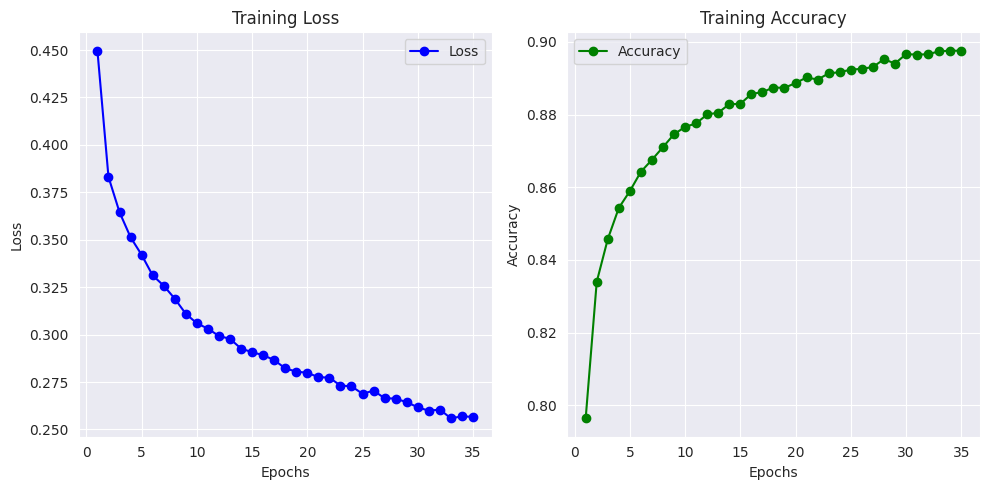

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

# Define the CNN Model
class SignalCNN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SignalCNN, self).__init__()

        self.conv1 = nn.Conv1d(input_dim, 32, kernel_size=3, padding='same')
        self.norm1 = nn.BatchNorm1d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding='same')
        self.norm2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(2)

        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding='same')
        self.norm3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()

        self.global_pool = nn.AdaptiveAvgPool1d(1)

        self.dropout1 = nn.Dropout(0.4)
        self.fc1 = nn.Linear(128, 64)

        self.dropout2 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(64, 64)

        self.dropout3 = nn.Dropout(0.4)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # Swap axes to (batch, channels, time)

        x = self.pool1(self.relu1(self.norm1(self.conv1(x))))
        x = self.pool2(self.relu2(self.norm2(self.conv2(x))))
        x = self.relu3(self.norm3(self.conv3(x)))

        x = self.global_pool(x).squeeze(-1)  # AdaptiveAvgPool1d to (batch, 128)

        x = self.dropout1(self.fc1(x))
        x = self.dropout2(self.fc2(x))
        x = self.fc3(self.dropout3(x))  # No activation since BCEWithLogitsLoss is used

        return x

# Create Model Instance
input_dim = 12
output_dim = 5
model = SignalCNN(input_dim, output_dim).cuda()

# Define Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()  # Suitable for multi-label classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dummy Data (Replace with actual dataset)
# X_train = torch.randn(17441, 1000, 12)  # Example input shape
# y_train = torch.randint(0, 2, (17441, 5)).float()  # Multi-label binary targets
Y_tensor = torch.tensor(Y_train_scaled , dtype = torch.float32)
Z_tensor = torch.tensor(Z_train.to_numpy() , dtype = torch.float32)

train_dataset = TensorDataset(Y_tensor, Z_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Training Loop with Graph Tracking
num_epochs = 35
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct = 0
    total_samples = 0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)

        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Compute Accuracy (Multi-label)
        predictions = torch.sigmoid(outputs) > 0.5  # Convert logits to binary predictions
        correct += (predictions == batch_y).sum().item()
        total_samples += batch_y.numel()  # Count total elements

    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total_samples  # Multi-label accuracy

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

print("Training Complete.")

# Plot Loss and Accuracy Graph
epochs = np.arange(1, num_epochs + 1)

plt.figure(figsize=(10, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, marker='o', linestyle='-', color='b', label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()
plt.grid(True)

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, marker='o', linestyle='-', color='g', label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
